In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
import glob
import os
import tensorflow as tf

In [ ]:
train_base_dir = os.path.join('/content/drive/MyDrive/Alzheimer_s Dataset/train')
train_MildDemented_dir = os.path.join(train_base_dir,'MildDemented')
train_ModerateDemented_dir = os.path.join(train_base_dir,'ModerateDemented')
train_NonDemented_dir = os.path.join(train_base_dir,'NonDemented')
train_VeryMildDemented_dir = os.path.join(train_base_dir,'VeryMildDemented')

train_MildDemented_files = glob.glob(train_MildDemented_dir+'/*.jpg')
train_ModerateDemented_files = glob.glob(train_ModerateDemented_dir+'/*.jpg')
train_NonDemented_files = glob.glob(train_NonDemented_dir+'/*.jpg')
train_VeryMildDemented_files = glob.glob(train_VeryMildDemented_dir+'/*.jpg')

len(train_MildDemented_files), len(train_ModerateDemented_files),len(train_NonDemented_files), len(train_VeryMildDemented_files)

(717, 52, 2560, 1792)

In [ ]:
test_base_dir = os.path.join('/content/drive/MyDrive/Alzheimer_s Dataset/test')
test_MildDemented_dir = os.path.join(test_base_dir,'MildDemented')
test_ModerateDemented_dir = os.path.join(test_base_dir,'ModerateDemented')
test_NonDemented_dir = os.path.join(test_base_dir,'NonDemented')
test_VeryMildDemented_dir = os.path.join(test_base_dir,'VeryMildDemented')

test_MildDemented_files = glob.glob(test_MildDemented_dir+'/*.jpg')
test_ModerateDemented_files = glob.glob(test_ModerateDemented_dir+'/*.jpg')
test_NonDemented_files = glob.glob(test_NonDemented_dir+'/*.jpg')
test_VeryMildDemented_files = glob.glob(test_VeryMildDemented_dir+'/*.jpg')

len(test_MildDemented_files), len(test_ModerateDemented_files),len(test_NonDemented_files), len(test_VeryMildDemented_files)

(179, 12, 640, 448)

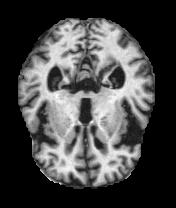

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread(train_MildDemented_files[2])
cv2_imshow(img)

In [ ]:
# import statements
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

# loading training data
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/Alzheimer_s Dataset/train',
        target_size=(125, 125),
        batch_size=32,
        class_mode='categorical')

Found 5121 images belonging to 4 classes.


In [ ]:
# loading testing data
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/Alzheimer_s Dataset/test',
        target_size=(125, 125),
        batch_size=32,
        class_mode='categorical')

Found 1279 images belonging to 4 classes.


In [ ]:
# initialising sequential model and adding layers to it
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=48, kernel_size=3, activation='relu', input_shape=[125, 125, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=48, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(128, activation='relu'))
cnn.add(tf.keras.layers.Dense(64, activation='relu'))
cnn.add(tf.keras.layers.Dense(4, activation='softmax'))

In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 123, 123, 48)      1344      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 61, 61, 48)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 59, 59, 48)        20784     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 29, 29, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 27, 27, 32)        13856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0

In [ ]:
# finally compile and train the cnn
cnn.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
cnn.fit(x=train_generator, validation_data=test_generator, epochs=30)

Epoch 1/30
161/161 [==============================] - 1784s 11s/step - loss: 1.0645 - accuracy: 0.4728 - val_loss: 1.0118 - val_accuracy: 0.5387
Epoch 2/30
161/161 [==============================] - 147s 915ms/step - loss: 0.9632 - accuracy: 0.5281 - val_loss: 1.0248 - val_accuracy: 0.5340
Epoch 3/30
161/161 [==============================] - 147s 913ms/step - loss: 0.8978 - accuracy: 0.5719 - val_loss: 0.9838 - val_accuracy: 0.5387
Epoch 4/30
161/161 [==============================] - 146s 907ms/step - loss: 0.9001 - accuracy: 0.5755 - val_loss: 1.0271 - val_accuracy: 0.5379
Epoch 5/30
161/161 [==============================] - 146s 904ms/step - loss: 0.8584 - accuracy: 0.5915 - val_loss: 1.0401 - val_accuracy: 0.5410
Epoch 6/30
161/161 [==============================] - 145s 899ms/step - loss: 0.8351 - accuracy: 0.5979 - val_loss: 1.0477 - val_accuracy: 0.5567
Epoch 7/30
161/161 [==============================] - 144s 897ms/step - loss: 0.8121 - accuracy: 0.6159 - val_loss: 1.0377 - 

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
img = image.load_img('/content/drive/MyDrive/Alzheimer_s Dataset/test/MildDemented/26 (24).jpg',target_size=(125,125))
img = image.img_to_array(img)
img = np.expand_dims(img,axis=0)   ### flattening
ypred = cnn.predict(img)
if ypred[0][0] == 1:
  print("MCI positive")
elif ypred[0][1] == 1:
  print("Alzheimer's positive")
elif ypred[0][2] == 1:
  print("Alzheimer's negative")
elif ypred[0][3] == 1:
  print("MCI positive")

FileNotFoundError: ignored